In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz # plot tree
from sklearn.metrics import roc_curve, auc # for evaluation models
from sklearn.metrics import classification_report # for evaluation models
from sklearn.metrics import confusion_matrix # for evaluation models
from sklearn.model_selection import train_test_split # for data splitting

from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy import stats
import pylab

import eli5 # for permutation importance
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print(os.getcwd())

C:\Users\rrica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\rrica\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\personal\estudio\DatAna_BigDat\05.DataScienceWithPython\Task04\entregables


In [2]:
# Acceder al conjunto de datos
dsHeart = pd.read_csv('heart.csv')

In [3]:
dsHeart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
dsHeart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
dsHeart.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [6]:
dsHeart.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [7]:
# Obtener el nombre de todas las columnas que existen en el conjunto de datos
dsHeart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Hay 1025 líneas y 14 columnas. La columna Objetivo la variable dependiente y solo puede tener valores (0/1)


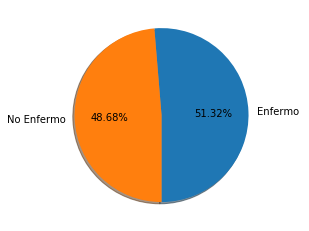

In [8]:
# Renombrar las columnas
dsHeart.columns=['Edad', 'Genero', 'DP', 'PA', 'Colest', 'AzuSan', 'ResulECG', 'FCM', 
                 'AngIndEje', 'DepST', 'PenSegST', 'CA', 'Talasemia', 'Objetivo']

# Obtener la cantidad de líneas y columnas en el conjunto de datos
nLineas, nColumnas = dsHeart.shape

# Cantidad de enfermos y no enfermos según la variable objetivo "target/Objetivo"
## n_with_disease = dsHeart[dsHeart["Objetivo"]==1].shape[0]
## n_without_disease = dsHeart[dsHeart["Objetivo"]==0].shape[0]
print(f'Hay {nLineas} líneas y {nColumnas} columnas. La columna Objetivo la variable dependiente y solo puede tener valores (0/1)')

enfermo = len(dsHeart[dsHeart['Objetivo'] == 1])
noEnfermo = len(dsHeart[dsHeart['Objetivo'] == 0])

# Gráfico de los datos en la columna "Objetivo"
plt.pie(x=[enfermo, noEnfermo], explode=(0, 0), labels=['Enfermo ', 'No Enfermo'], autopct='%1.2f%%', shadow=True, startangle=270)

plt.show()

In [9]:
# Verificar muestra de 3 filas, con nombre de columnas modificados
dsHeart = dsHeart.reset_index()
dsHeart = dsHeart.drop(['index'], axis=1)
dsHeart.sample(3)

Edad  Genero  DP   PA  Colest  AzuSan  ResulECG  FCM  AngIndEje  DepST  \
779    34       0   1  118     210       0         1  192          0    0.7   
241    67       1   2  152     212       0         0  150          0    0.8   
331    63       0   0  108     269       0         1  169          1    1.8   

     PenSegST  CA  Talasemia  Objetivo  
779         2   0          2         1  
241         1   0          3         0  
331         1   2          2         0

In [10]:
# Obtener el número de puntos de datos faltantes, valores de NA y NAN por columna

total = dsHeart.isnull().sum().sort_values(ascending = True)
porcentaje = (dsHeart.isnull().sum() / dsHeart.isnull().count()).sort_values(ascending = True)
datosPerdidos = pd.concat([total, porcentaje], axis = 1, keys = ['Total', 'Porcentaje'])

total = dsHeart.isna().sum().sort_values(ascending = True)
porcentaje = (dsHeart.isna().sum() / dsHeart.isna().count()).sort_values(ascending = True)
datosNulos = pd.concat([total, porcentaje], axis = 1, keys = ['Total', 'Porcentaje'])

if((datosPerdidos.all()).all() > 0 or (datosNulos.all()).all() > 0):
     print('Datos faltantes encontrados o valores nulos')
        
print(datosNulos, "\n\n", datosPerdidos)

           Total  Porcentaje
Edad           0         0.0
Genero         0         0.0
DP             0         0.0
PA             0         0.0
Colest         0         0.0
AzuSan         0         0.0
ResulECG       0         0.0
FCM            0         0.0
AngIndEje      0         0.0
DepST          0         0.0
PenSegST       0         0.0
CA             0         0.0
Talasemia      0         0.0
Objetivo       0         0.0 

            Total  Porcentaje
Edad           0         0.0
Genero         0         0.0
DP             0         0.0
PA             0         0.0
Colest         0         0.0
AzuSan         0         0.0
ResulECG       0         0.0
FCM            0         0.0
AngIndEje      0         0.0
DepST          0         0.0
PenSegST       0         0.0
CA             0         0.0
Talasemia      0         0.0
Objetivo       0         0.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

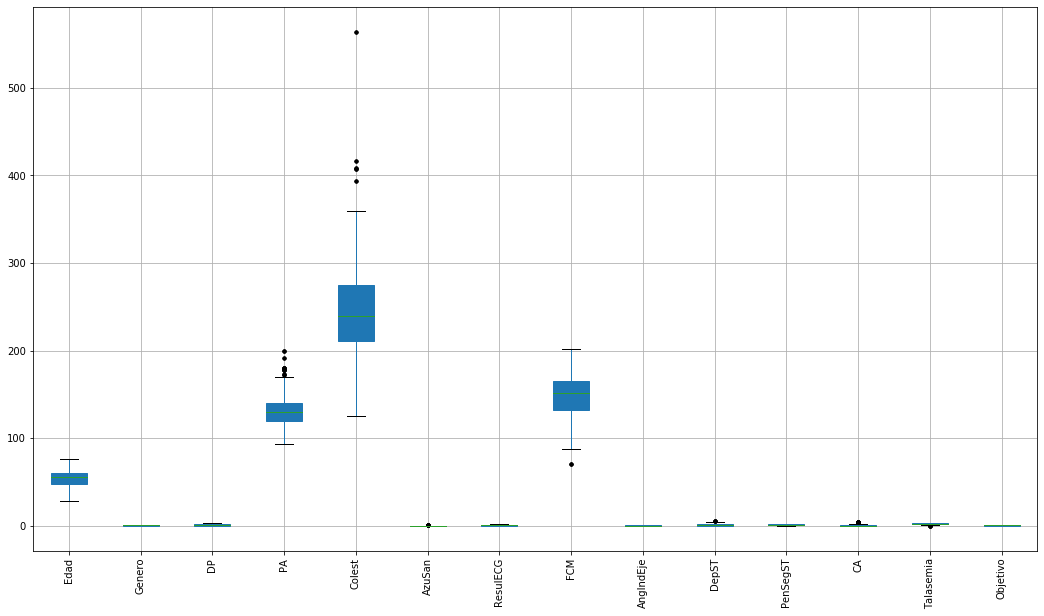

In [11]:
# Detectar valores atípicos
plt.subplots(figsize = (18,10))
dsHeart.boxplot(patch_artist = True, sym = "k.")
plt.xticks(rotation = 90)

In [12]:
dfHeart = dsHeart[~(np.abs(stats.zscore(dsHeart)) < 3).all(axis = 1)]
dfHeart

Edad  Genero  DP   PA  Colest  AzuSan  ResulECG  FCM  AngIndEje  DepST  \
14     52       1   0  128     204       1         1  156          1    1.0   
52     38       1   2  138     175       0         1  173          0    0.0   
54     55       1   0  140     217       0         1  111          1    5.6   
55     55       1   0  140     217       0         1  111          1    5.6   
69     62       0   0  160     164       0         0  145          0    6.2   
83     38       1   2  138     175       0         1  173          0    0.0   
123    65       0   2  140     417       1         0  157          0    0.8   
128    52       1   2  138     223       0         1  169          0    0.0   
151    54       1   1  192     283       0         0  195          0    0.0   
158    67       0   2  115     564       0         0  160          0    1.6   
175    56       0   0  200     288       1         0  133          1    4.0   
179    56       0   0  134     409       0         0  150          1    1.9   
192    67       0   2  115     564       0         0  160          0    1.6   
208    38       1   2  138     175       0         1  173          0    0.0   
242    38       1   2  138     175       0         1  173          0    0.0   
246    54       1   1  192     283       0         0  195          0    0.0   
267    67       1   0  120     237       0         1   71          0    1.0   
290    52       1   2  138     223       0         1  169          0    0.0   
294    56       0   0  200     288       1         0  133          1    4.0   
296    67       1   0  120     237       0         1   71          0    1.0   
319    53       0   2  128     216       0         0  115          0    0.0   
326    54       1   1  192     283       0         0  195          0    0.0   
329    53       0   2  128     216       0         0  115          0    0.0   
340    38       1   2  138     175       0         1  173          0    0.0   
348    43       1   0  132     247       1         0  143          1    0.1   
359    53       0   2  128     216       0         0  115          0    0.0   
378    67       1   0  120     237       0         1   71          0    1.0   
393    62       0   0  160     164       0         0  145          0    6.2   
417    52       1   2  138     223       0         1  169          0    0.0   
428    43       1   0  132     247       1         0  143          1    0.1   
450    63       0   0  150     407       0         0  154          0    4.0   
464    67       0   2  115     564       0         0  160          0    1.6   
465    38       1   2  138     175       0         1  173          0    0.0   
481    63       0   0  150     407       0         0  154          0    4.0   
508    56       0   0  200     288       1         0  133          1    4.0   
521    58       1   1  125     220       0         1  144          0    0.4   
526    62       0   0  160     164       0         0  145          0    6.2   
559    67       1   0  120     237       0         1   71          0    1.0   
597    38       1   2  138     175       0         1  173          0    0.0   
613    55       1   0  140     217       0         1  111          1    5.6   
641    56       0   0  134     409       0         0  150          1    1.9   
665    65       0   2  140     417       1         0  157          0    0.8   
685    63       0   0  150     407       0         0  154          0    4.0   
686    52       1   0  128     204       1         1  156          1    1.0   
688    56       0   0  200     288       1         0  133          1    4.0   
734    52       1   0  128     204       1         1  156          1    1.0   
743    58       1   1  125     220       0         1  144          0    0.4   
749    58       1   1  125     220       0         1  144          0    0.4   
831    58       1   1  125     220       0         1  144          0    0.4   
833    55       1   0  140     217       0         1  1

In [13]:
dsHeart = dsHeart.drop(dsHeart[~(np.abs(stats.zscore(dsHeart)) < 3).all(axis = 1)].index)

In [14]:
dsHeart.describe()

Edad      Genero          DP         PA      Colest      AzuSan  \
count  969.000000  969.000000  969.000000  969.00000  969.000000  969.000000   
mean    54.417957    0.701754    0.948400  130.98968  244.467492    0.143447   
std      9.074174    0.457724    1.035237   16.94101   46.125807    0.350709   
min     29.000000    0.000000    0.000000   94.00000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.00000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.00000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.00000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  180.00000  394.000000    1.000000   

         ResulECG         FCM   AngIndEje       DepST    PenSegST          CA  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.532508  149.308566    0.337461    1.034572    1.398349    0.681115   
std      0.529332   22.590880    0.473088    1.092665    0.608342    0.929578   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  132.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.800000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    4.400000    2.000000    3.000000   

        Talasemia    Objetivo  
count  969.000000  969.000000  
mean     2.325077    0.518060  
std      0.593178    0.499932  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [15]:
# Convertir datos categóricos

dsHeart['Genero'] = dsHeart['Genero'].replace([1, 0], ['Hombre', 'Mujer'])
dsHeart['DP'] = dsHeart['DP'].replace([0, 1, 2, 3], ['Angina típica', 'Angina atípica', 'Dolor no anginal', 'Asintomático'])
dsHeart['AzuSan'] = dsHeart['AzuSan'].replace([1, 0], ['Si', 'No'])
dsHeart['ResulECG'] = dsHeart['ResulECG'].replace([0, 1, 2], ['Normal', 'Anormalidad', 'Hipertrofia'])
dsHeart['AngIndEje'] = dsHeart['AngIndEje'].replace([1, 0], ['Si', 'No'])
dsHeart['PenSegST'] = dsHeart['PenSegST'].replace([0, 1, 2], ['Subida', 'Plano', 'Bajada'])
dsHeart['Talasemia'] = dsHeart['Talasemia'].replace([1, 2, 3], ['Normal', 'Defecto fijo', 'Defecto reversible'])
dsHeart['Objetivo'] = dsHeart['Objetivo'].replace([0, 1], ['Ausencia', 'Presencia'])

dsHeart['Genero'] = dsHeart['Genero'].astype('object')
dsHeart['DP'] = dsHeart['DP'].astype('object')
dsHeart['AzuSan'] = dsHeart['AzuSan'].astype('object')
dsHeart['ResulECG'] = dsHeart['ResulECG'].astype('object')
dsHeart['AngIndEje'] = dsHeart['AngIndEje'].astype('object')
dsHeart['PenSegST'] = dsHeart['PenSegST'].astype('object')
dsHeart['Talasemia'] = dsHeart['Talasemia'].astype('object')

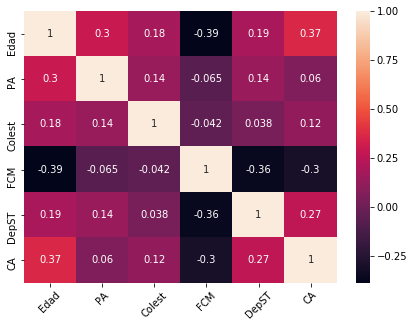

In [16]:
# Relaciones de atributos

copy_dsHeart = dsHeart.copy()
copy_dsHeart = copy_dsHeart.drop(['Genero', 'DP', 'AzuSan', 'ResulECG', 
                                  'AngIndEje', 'PenSegST', 'Talasemia', 'Objetivo']
                                 , axis = 1)

plt.subplots(figsize=(7, 5))
plt.xticks(rotation = 45)

correlacion = sns.heatmap(copy_dsHeart.corr(), annot=True)
bottom, top = correlacion.get_ylim()
correlacion.set_ylim(bottom + 0.5, top - 0.5)

figura = correlacion.get_figure()    
figura.savefig('report\\correlacion.png', dpi = 400)

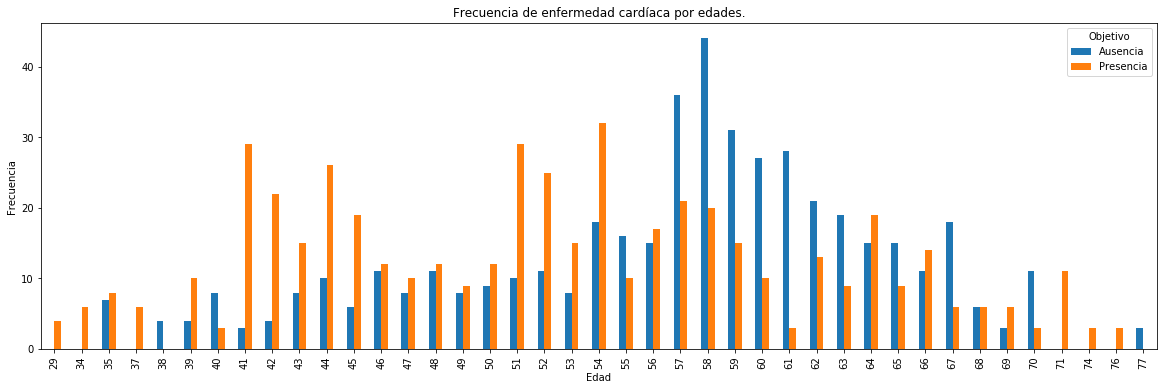

In [17]:
# Edad como variable continua

pd.crosstab(dsHeart['Edad'], dsHeart['Objetivo']).plot(kind = "bar", figsize = (20, 6))
plt.title('Frecuencia de enfermedad cardíaca por edades.')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('report\\enfermoVSedades.png')
plt.show()

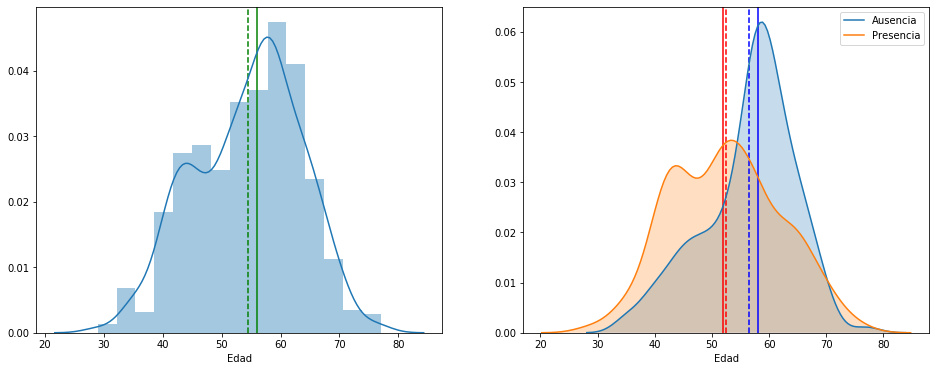

 	La media y la mediana del conjunto de datos completo son 54.42 y 56.0.
	Datos de media y mediana de ausencia = 56.55 y 58.0
	Datos de media y mediana de presencia = 52.43 y 52.0


In [18]:
ausencia = dsHeart[dsHeart['Objetivo'] == 'Ausencia']['Edad']
presence = dsHeart[dsHeart['Objetivo'] == 'Presencia']['Edad']

figura, ax = plt.subplots(1, 2, figsize = (16, 6))
media = round(dsHeart['Edad'].mean(), 2)
mediana = dsHeart['Edad'].median()
a_median = ausencia.median()
a_mean = round(ausencia.mean(), 2)
p_median = presence.median()
p_mean = round(presence.mean(), 2)

ax[1].axvline(p_median, color = 'r', linestyle = '-')
ax[1].axvline(p_mean, color = 'r', linestyle='--')
ax[1].axvline(a_median, color = 'b', linestyle='-')
ax[1].axvline(a_mean, color = 'b', linestyle='--')
ax[0].axvline(mediana, color = 'g', linestyle='-')
ax[0].axvline(media, color = 'g', linestyle='--')

ax[0] = sns.distplot(dsHeart['Edad'], bins = 15, ax = ax[0])
ax[1] = sns.kdeplot(ausencia, label = 'Ausencia', shade = True)
ax[1] = sns.kdeplot(presence, label = 'Presencia', shade = True)

plt.xlabel('Edad');
plt.show()

figura.savefig('report\\edad_old.png')

print(f' \tLa media y la mediana del conjunto de datos completo son {media} y {mediana}.\n\tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tDatos de media y mediana de presencia = {p_mean} y {p_median}')

In [19]:
# Si la asimetría está entre -0.5 y 0.5, los datos son bastante simétricos

print(f"Prueba normal para la distribución de edad {stats.normaltest(dsHeart['Edad'])}") #Hipótesis nula: los datos provienen de una distribución normal.

print(f"Inclinación para todo el conjunto de datos {pd.DataFrame.skew(dsHeart['Edad'], axis = 0)}") #Izquierda sesgada
print(f"Inclinación del grupo no enfermo {pd.DataFrame.skew(ausencia, axis = 0)}")  # derecha sesgada
print(f"Inclinación del grupo enfermo {pd.DataFrame.skew(presence, axis=0)}")   # izquierda sesgada

Prueba normal para la distribución de edad NormaltestResult(statistic=28.680752996792243, pvalue=5.916346733394443e-07)
Inclinación para todo el conjunto de datos -0.2319217741787757
Inclinación del grupo no enfermo -0.5804148049337673
Inclinación del grupo enfermo 0.11879258108180714


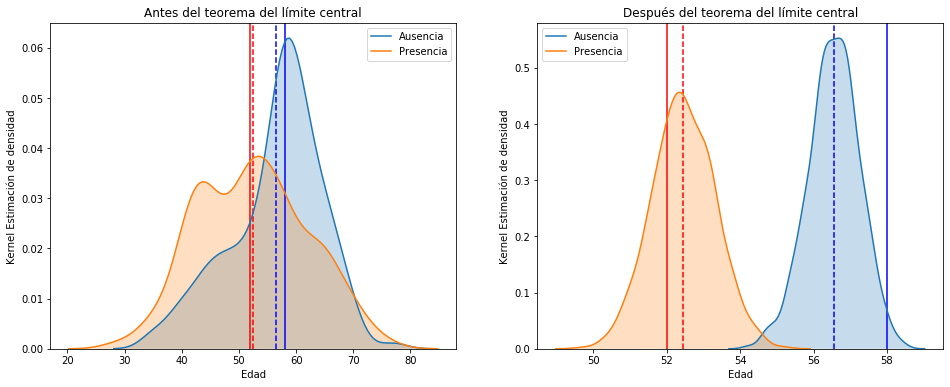

 	Datos de media y mediana de ausencia = 56.55 y 58.0
	Datos de media y mediana de presencia = 52.43 y 52.0


In [20]:
ausenciaMeans = []
presenceMeans = []
sampleMeans=[]
for _ in range(1000):
    samples = dsHeart['Edad'].sample(n=200)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = ausencia.sample(n=100)
    sampleMean = np.mean(samples)
    ausenciaMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(ausencia, label='Ausencia', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presencia',shade=True,ax=ax[0])
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Kernel Estimación de densidad')
ax[0].set_title('Antes del teorema del límite central')

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[1] =sns.kdeplot(ausenciaMeans, label='Ausencia', shade=True,ax=ax[1])
ax[1] =sns.kdeplot(presenceMeans, label='Presencia',shade=True,ax=ax[1])
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Kernel Estimación de densidad')
ax[1].set_title('Después del teorema del límite central')

plt.show()
fig.savefig('report\\edad.png')

print(f' \tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tDatos de media y mediana de presencia = {p_mean} y {p_median}')

In [21]:
# t-test en muestras independientes
t2, p2 = stats.ttest_ind(presence, ausencia)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -7.255730666302986
p = 1.637929434905944e-12


In [22]:
# Presión sanguínea en reposo
print(f"Prueba normal para todo el conjunto de datos {stats.normaltest(dsHeart['PA'])}") 
      #Hipótesis nula: los datos provienen de una distribución normal.

Prueba normal para todo el conjunto de datos NormaltestResult(statistic=45.32367723100202, pvalue=1.4390919356594288e-10)


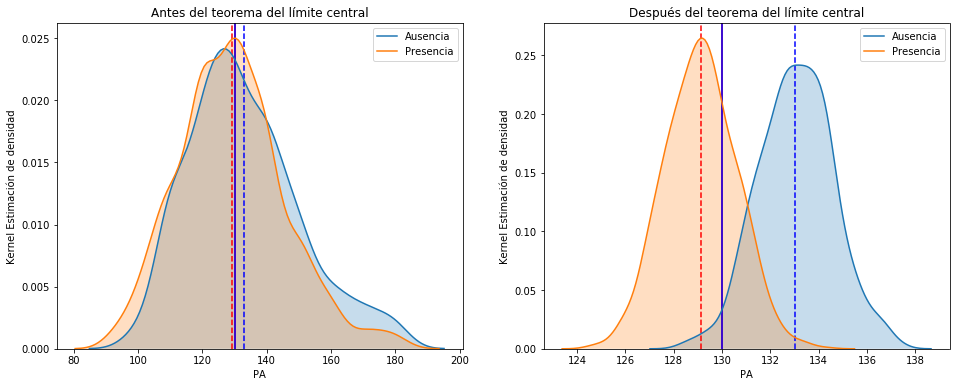

 	Datos de media y mediana de ausencia = 133.0 y 130.0
	Datos de media y mediana de presencia = 129.12 y 130.0  


In [23]:
ausencia = dsHeart[dsHeart['Objetivo'] == 'Ausencia']['PA']
presence = dsHeart[dsHeart['Objetivo'] == 'Presencia']['PA']

a_median=ausencia.median()
a_mean=round(ausencia.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)

ausenciaMeans = []
presenceMeans = []
sampleMeans=[]

for _ in range(1000):
    samples = dsHeart['PA'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = ausencia.sample(n=100)
    sampleMean = np.mean(samples)
    ausenciaMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')

ax[0] =sns.kdeplot(ausencia, label='Ausencia', shade = True, ax = ax[0])
ax[0] =sns.kdeplot(presence, label='Presencia', shade = True, ax = ax[0])
ax[0].set_xlabel('PA')
ax[0].set_ylabel('Kernel Estimación de densidad')
ax[0].set_title('Antes del teorema del límite central')

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')

ax[1] =sns.kdeplot(ausenciaMeans, label='Ausencia', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presencia',shade=True)
ax[1].set_xlabel('PA')
ax[1].set_ylabel('Kernel Estimación de densidad')
ax[1].set_title('Después del teorema del límite central')

plt.show()
fig.savefig('report\\presionarterial.png')

print(f' \tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tDatos de media y mediana de presencia = {p_mean} y {p_median}  ')

In [24]:
#t-test en muestras independientes
t2, p2 = stats.ttest_ind(presenceMeans,ausenciaMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -58.50674896952693
p = 0.0


In [25]:
# Colesterol

print(f"Prueba normal para todo el conjunto de datos {stats.normaltest(dsHeart['Colest'])}") 
      #Hipótesis nula: los datos provienen de una distribución normal.

Prueba normal para todo el conjunto de datos NormaltestResult(statistic=11.822378530605569, pvalue=0.00270896329486012)


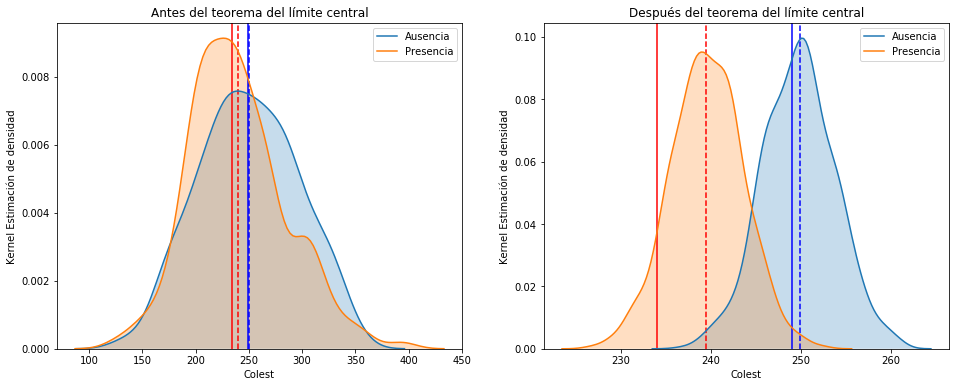

 	Datos de media y mediana de ausencia = 249.84 y 249.0
	Datos de media y mediana de presencia = 239.47 y 234.0  


In [26]:
ausencia = dsHeart[dsHeart['Objetivo']=='Ausencia']['Colest']
presence = dsHeart[dsHeart['Objetivo']=='Presencia']['Colest']

a_median=ausencia.median()
a_mean=round(ausencia.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)

ausenciaMeans = []
presenceMeans = []
sampleMeans=[]

for _ in range(1000):
    samples = dsHeart['Colest'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = ausencia.sample(n=100)
    sampleMean = np.mean(samples)
    ausenciaMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')
ax[0] =sns.kdeplot(ausencia, label='Ausencia', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presencia',shade=True,ax=ax[0])
ax[0].set_xlabel('Colest')
ax[0].set_ylabel('Kernel Estimación de densidad')
ax[0].set_title('Antes del teorema del límite central')

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[1] =sns.kdeplot(ausenciaMeans, label='Ausencia', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presencia',shade=True)
ax[1].set_xlabel('Colest')
ax[1].set_ylabel('Kernel Estimación de densidad')
ax[1].set_title('Después del teorema del límite central')

plt.show()
fig.savefig('report\\colesterol.png')

print(f' \tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tDatos de media y mediana de presencia = {p_mean} y {p_median}  ')

In [27]:
#t-test en muestras independientes
t2, p2 = stats.ttest_ind(presenceMeans, ausenciaMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -56.66488844091623
p = 0.0


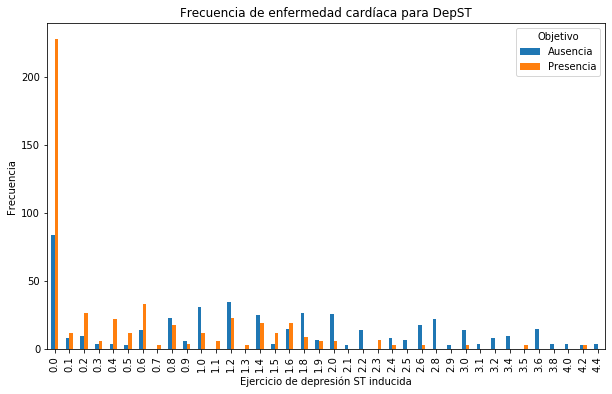

In [28]:
# Depresión ST inducida

pd.crosstab(dsHeart['DepST'],dsHeart['Objetivo']).plot(kind="bar",figsize=(10,6))
plt.title('Frecuencia de enfermedad cardíaca para DepST')
plt.xlabel('Ejercicio de depresión ST inducida')
plt.ylabel('Frecuencia')
plt.show()

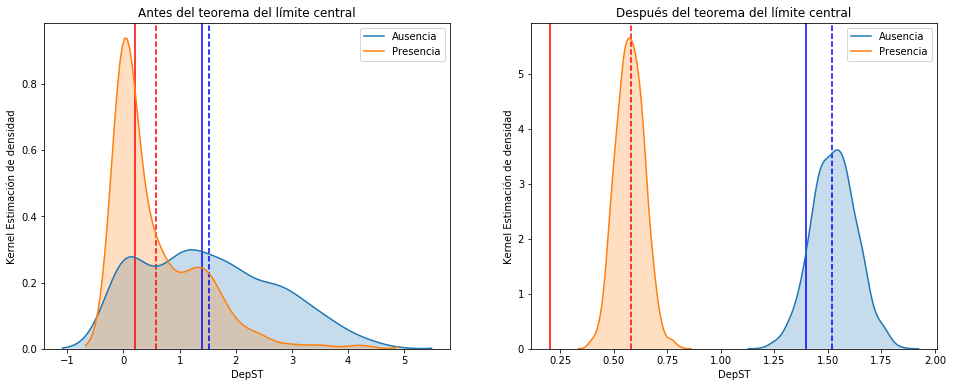

 	Datos de media y mediana de ausencia = 1.52 y 1.4
	Datos de media y mediana de presencia = 0.58 y 0.2


In [29]:
ausencia = dsHeart[dsHeart['Objetivo']=='Ausencia']['DepST']
presence = dsHeart[dsHeart['Objetivo']=='Presencia']['DepST']

a_median=ausencia.median()
a_mean=round(ausencia.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)

ausenciaMeans = []
presenceMeans = []
sampleMeans=[]

for _ in range(1000):
    samples = dsHeart['DepST'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = ausencia.sample(n=100)
    sampleMean = np.mean(samples)
    ausenciaMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')
ax[0] =sns.kdeplot(ausencia, label='Ausencia', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presencia',shade=True,ax=ax[0])
ax[0].set_xlabel('DepST')
ax[0].set_ylabel('Kernel Estimación de densidad')
ax[0].set_title('Antes del teorema del límite central')

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[1] =sns.kdeplot(ausenciaMeans, label='Ausencia', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presencia',shade=True)
ax[1].set_xlabel('DepST')
ax[1].set_ylabel('Kernel Estimación de densidad')
ax[1].set_title('Después del teorema del límite central')

plt.show()
fig.savefig('report\\depresionst.png')

print(f' \tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tDatos de media y mediana de presencia = {p_mean} y {p_median}')

In [30]:
#t-test en muestras independientes
t2, p2 = stats.ttest_ind(presenceMeans,ausenciaMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = -246.17109460031855
p = 0.0


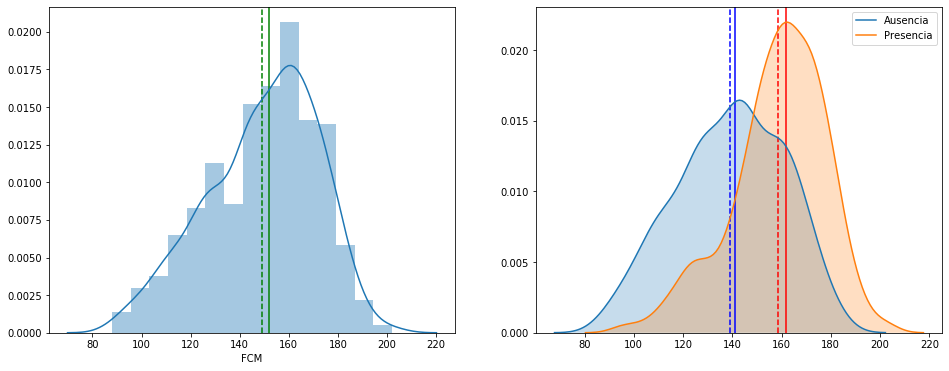

 	La media y la mediana del conjunto de datos completo = 149 y 152.0
	La media y la mediana del conjunto de datos completo = 139.24 y 141.0
	La media y la mediana de los datos de presencia = 158.67 y 162.0


In [31]:
ausencia = dsHeart[dsHeart['Objetivo']==1]['FCM']
ausencia = dsHeart[dsHeart['Objetivo']=='Ausencia']['FCM']
presence = dsHeart[dsHeart['Objetivo']=='Presencia']['FCM']

mean=round(dsHeart['FCM'].mean())
median=dsHeart['FCM'].median()
a_median=ausencia.median()
a_mean=round(ausencia.mean(),2)
p_median=presence.median()
p_mean=round(presence.mean(),2)

fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(median, color='g', linestyle='-')
ax[0].axvline(mean, color='g', linestyle='--')
ax[0]=sns.distplot(dsHeart['FCM'],bins=15,ax=ax[0])

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[1] =sns.kdeplot(ausencia, label='Ausencia', shade=True)
ax[1] =sns.kdeplot(presence, label='Presencia',shade=True)

plt.show()

fig.savefig('report\\frecuenciacardiacamaxima_old.png')
print(f' \tLa media y la mediana del conjunto de datos completo = {mean} y {median}\n\tLa media y la mediana del conjunto de datos completo = {a_mean} y {a_median}\n\tLa media y la mediana de los datos de presencia = {p_mean} y {p_median}')

# DepST: Depresión del ST inducida por el ejercicio relativo al descanso

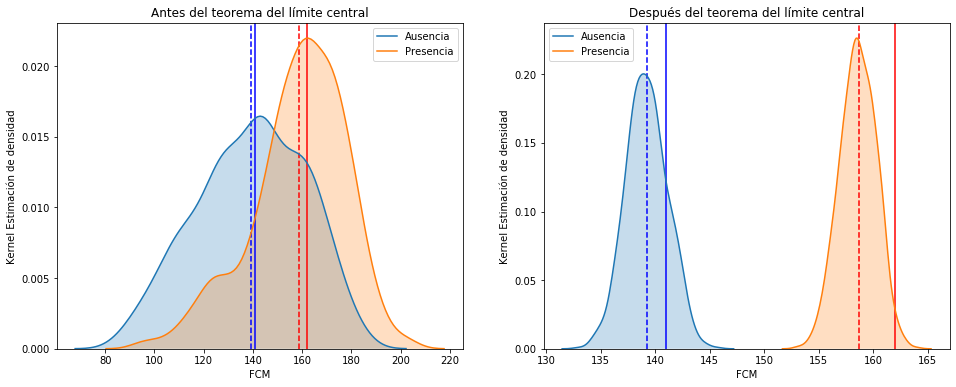

 	La media y la mediana del conjunto de datos completo = 149 y 152.0
	Datos de media y mediana de ausencia = 139.24 y 141.0
	La media y la mediana de los datos de presencia = 158.67 y 162.0


In [32]:
ausenciaMeans = []
presenceMeans = []
sampleMeans=[]

for _ in range(1000):
    samples = dsHeart['FCM'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
    
    samples = ausencia.sample(n=100)
    sampleMean = np.mean(samples)
    ausenciaMeans.append(sampleMean)
    
    samples = presence.sample(n=100)
    sampleMean = np.mean(samples)
    presenceMeans.append(sampleMean)    
    
fig, ax = plt.subplots(1,2,figsize=(16,6))

ax[0].axvline(p_median, color='r', linestyle='-')
ax[0].axvline(p_mean, color='r', linestyle='--')
ax[0].axvline(a_median, color='b', linestyle='-')
ax[0].axvline(a_mean, color='b', linestyle='--')
ax[0] =sns.kdeplot(ausencia, label='Ausencia', shade=True,ax=ax[0])
ax[0] =sns.kdeplot(presence, label='Presencia',shade=True,ax=ax[0])
ax[0].set_xlabel('FCM')
ax[0].set_ylabel('Kernel Estimación de densidad')
ax[0].set_title('Antes del teorema del límite central')

ax[1].axvline(p_median, color='r', linestyle='-')
ax[1].axvline(p_mean, color='r', linestyle='--')
ax[1].axvline(a_median, color='b', linestyle='-')
ax[1].axvline(a_mean, color='b', linestyle='--')
ax[1] =sns.kdeplot(ausenciaMeans, label='Ausencia', shade=True)
ax[1] =sns.kdeplot(presenceMeans, label='Presencia',shade=True)
ax[1].set_xlabel('FCM')
ax[1].set_ylabel('Kernel Estimación de densidad')
ax[1].set_title('Después del teorema del límite central')

plt.show()
fig.savefig('report\\frecuenciacardiacamaxima.png')

print(f' \tLa media y la mediana del conjunto de datos completo = {mean} y {median}\n\tDatos de media y mediana de ausencia = {a_mean} y {a_median}\n\tLa media y la mediana de los datos de presencia = {p_mean} y {p_median}')

In [33]:
#t-test en muestras independientes
t2, p2 = stats.ttest_ind(presenceMeans,ausenciaMeans)
print("t = " + str(t2))
print("p = " + str(2*p2))

t = 241.1929852292452
p = 0.0


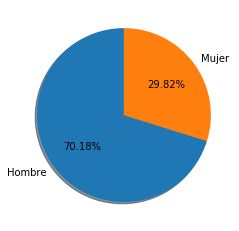

In [34]:
# Variables categóricas
# Género

hombre = len(dsHeart[dsHeart['Genero'] == 'Hombre'])
mujer = len(dsHeart[dsHeart['Genero'] == 'Mujer'])
plt.pie(x=[hombre, mujer], explode=(0, 0), labels=['Hombre', 'Mujer'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

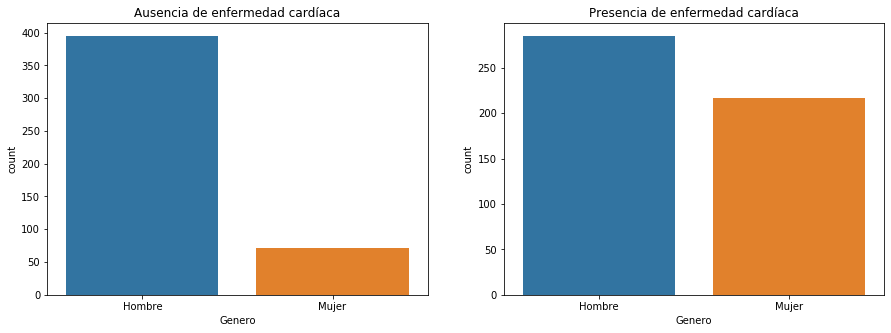

In [35]:
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["Genero"].sort_values()
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["Genero"].sort_values()
f, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\genero.png')

In [36]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['Genero'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square: las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis: Genero no está asociado con Objetivo
# Hipótesis alternativa: Genero está asociado con Objetivo

Chi-square: las estadísticas son 88.07363780957543 y el valor p es 6.3062518551189255e-21


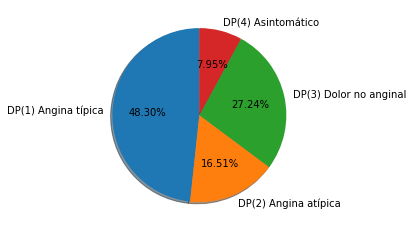

In [37]:
# Dolor en el pecho

x = [len(dsHeart[dsHeart['DP'] == 'Angina típica']), len(dsHeart[dsHeart['DP'] == 'Angina atípica']), len(dsHeart[dsHeart['DP'] == 'Dolor no anginal']), len(dsHeart[dsHeart['DP'] == 'Asintomático'])]
plt.pie(x, data=dsHeart, labels=['DP(1) Angina típica', 'DP(2) Angina atípica', 'DP(3) Dolor no anginal', 'DP(4) Asintomático'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

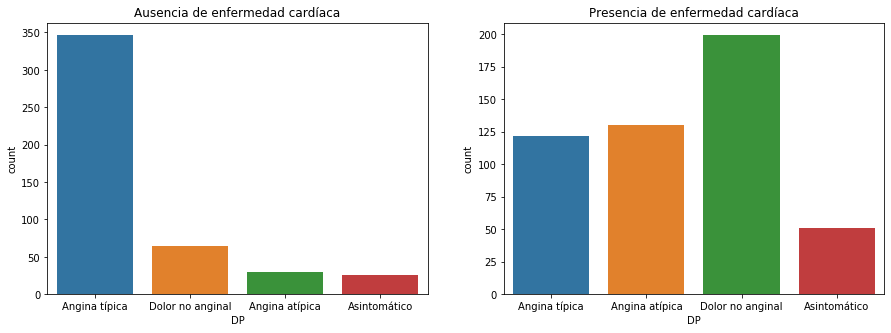

In [38]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["DP"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["DP"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\dolorpecho.png')

In [39]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['DP'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis : El dolor de pecho no está asociado con Objetivo
# Hipótesis alternativa: el dolor en el pecho está asociado con Objetivo

Chi-square las estadísticas son 244.90102604830952 y el valor p es 8.291170809908133e-53


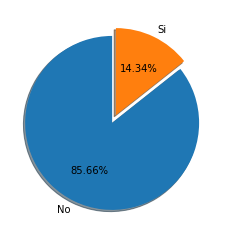

In [40]:
# Glucemia en ayunas [AzuSan: azúcar en sangre en ayunas> 120 mg / dl (1 = verdadero; 0 = falso)]

sizes = [len(dsHeart[dsHeart['AzuSan'] == 'No']), len(dsHeart[dsHeart['AzuSan'] == 'Si'])]
labels = ['No', 'Si']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

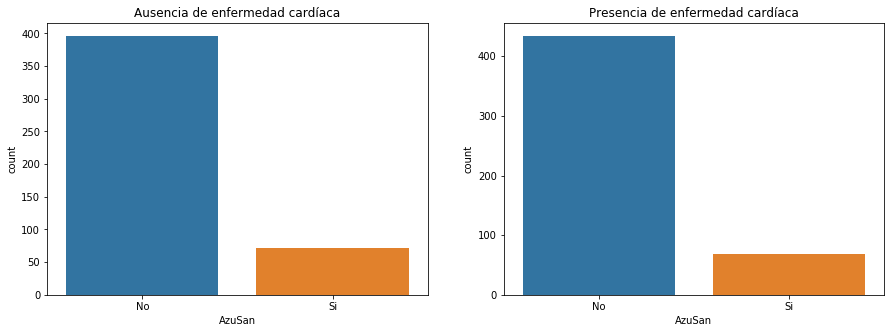

In [41]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["AzuSan"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["AzuSan"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\azucarensangre.png')

In [42]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['AzuSan'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
#Null hipótesis: AzuSan no está asociado con Objetivo
# Hipótesis alternativa: AzuSan está asociado con Objetivo

Chi-square las estadísticas son 0.4145254861443165 y el valor p es 0.5196814384402422


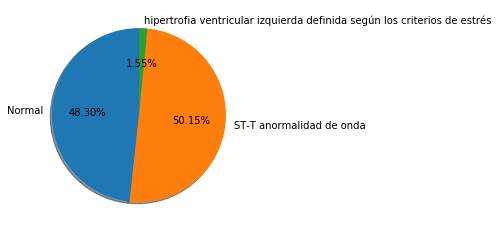

In [43]:
# Resultados de ECG en reposo

sizes = [len(dsHeart[dsHeart['ResulECG'] =='Normal']), len(dsHeart[dsHeart['ResulECG']=='Anormalidad']), len(dsHeart[dsHeart['ResulECG']=='Hipertrofia'])]
labels = ['Normal', 'ST-T anormalidad de onda', 'hipertrofia ventricular izquierda definida según los criterios de estrés']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

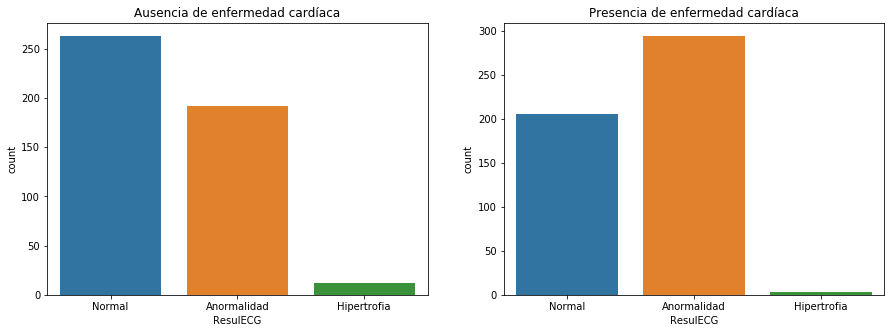

In [44]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["ResulECG"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["ResulECG"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0],order=['Normal', 'Anormalidad', 'Hipertrofia']).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence,ax=axes[1],order=['Normal', 'Anormalidad', 'Hipertrofia']).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\resultadoelectrocardiograma.png')

In [45]:
print(f'Probabilidad de hipertropía en grupo de enfermos = {presence[presence=="Hipertrofia"].value_counts()/len(presence)}')
print(f'Probabilidad de hipertropía en grupo no enfermos = {ausencia[ausencia=="Hipertrofia"].value_counts()/len(ausencia)}')

Probabilidad de hipertropía en grupo de enfermos = Hipertrofia    0.005976
Name: ResulECG, dtype: float64
Probabilidad de hipertropía en grupo no enfermos = Hipertrofia    0.025696
Name: ResulECG, dtype: float64


In [46]:
cont = pd.crosstab(dsHeart['ResulECG'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis: AngIndEje no está asociado con Objetivo
# Hipótesis alternativa: AngIndEje está asociado con Objetivo 

Chi-square las estadísticas son 32.774009780895085 y el valor p es 7.642126128277877e-08


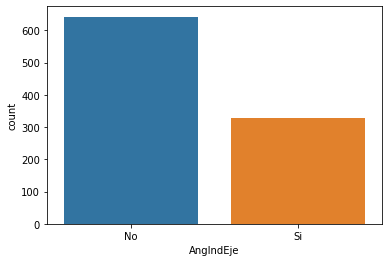

In [47]:
# Angina inducida por ejercicio [angina inducida por ejercicio (1 = sí; 0 = no)]

sns.countplot(data =dsHeart , x = 'AngIndEje')

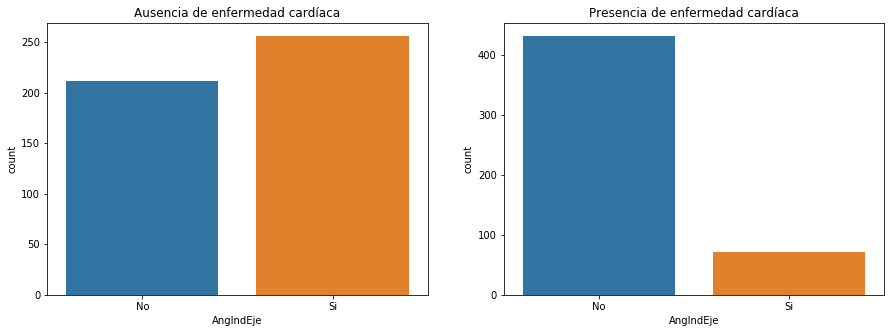

In [48]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["AngIndEje"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["AngIndEje"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\anginainducidaporejercicio.png')

In [49]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['AngIndEje'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
#Null hipótesis: AngIndEje no está asociado con Objetivo
# Hipótesis alternativa: AngIndEje está asociado con Objetivo 

Chi-square las estadísticas son 177.20777699276692 y el valor p es 1.9728847166723793e-40


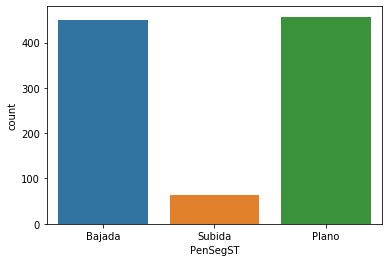

In [50]:
# Ejercicio pico segmento ST

sns.countplot(data = dsHeart, x = 'PenSegST')
# PenSegST: PenSegST del segmento ST de ejercicio pico
# Valor 1: pendiente arriba
# Valor 2: plano
# Valor 3: pendiente descendente

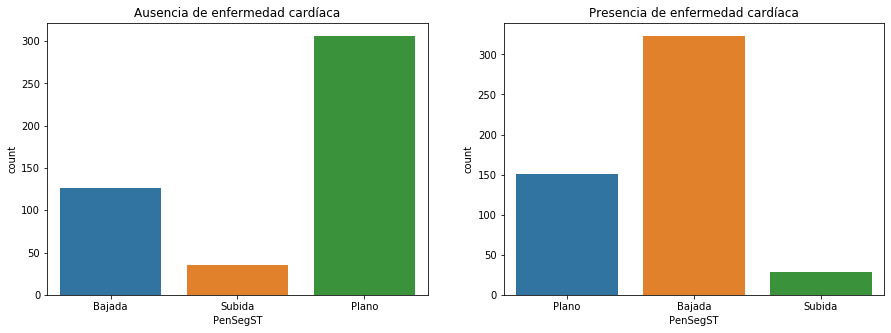

In [51]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["PenSegST"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["PenSegST"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\pendientesegmentost.png')

In [52]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['PenSegST'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis: PenSegST no está asociado con Objetivo
# Hipótesis alternativa: PenSegST está asociado con Objetivo

Chi-square las estadísticas son 138.6999549172278 y el valor p es 7.615307940487338e-31


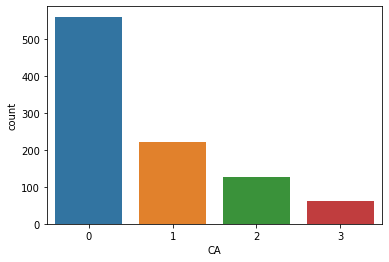

In [53]:
# Cantidad de vasos sanguíneos

sns.countplot(data =dsHeart , x = 'CA')

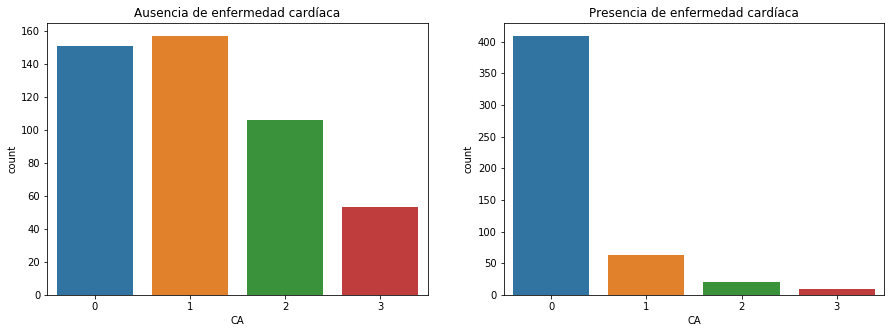

In [54]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["CA"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["CA"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0]).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1]).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\ca.png')

In [55]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['CA'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis: CA no está asociado con Objetivo
# Hipótesis alternativa: CA está asociada con Objetivo

Chi-square las estadísticas son 246.2005038539735 y el valor p es 4.340879806490937e-53


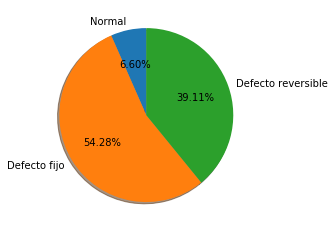

In [56]:
# Talasemia

sizes = [len(dsHeart[dsHeart['Talasemia'] =='Normal']), len(dsHeart[dsHeart['Talasemia']=='Defecto fijo']), len(dsHeart[dsHeart['Talasemia']=='Defecto reversible'])]
labels = ['Normal', 'Defecto fijo', 'Defecto reversible']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

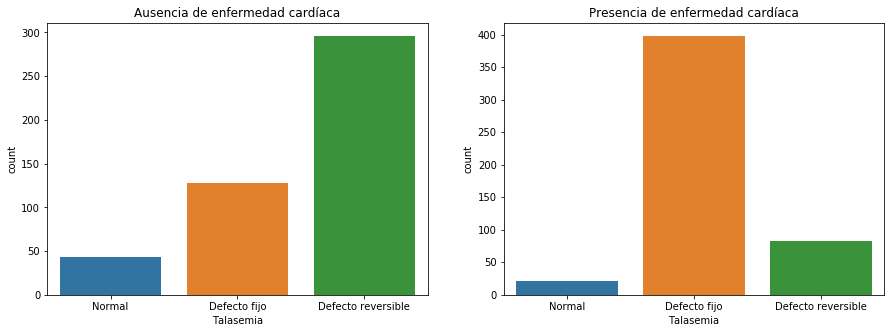

In [57]:
f, axes = plt.subplots(1,2,figsize=(15,5))
ausencia = dsHeart[dsHeart["Objetivo"]=='Ausencia']["Talasemia"]
presence = dsHeart[dsHeart["Objetivo"]=='Presencia']["Talasemia"]
sns.countplot(ausencia, data=dsHeart,ax=axes[0],order=['Normal', 'Defecto fijo', 'Defecto reversible']).set_title('Ausencia de enfermedad cardíaca')
sns.countplot(presence, data=dsHeart,ax=axes[1],order=['Normal', 'Defecto fijo', 'Defecto reversible']).set_title('Presencia de enfermedad cardíaca')
plt.show()
f.savefig('report\\talasemia.png')

In [58]:
# Chi-square prueba de independencia de variables
cont = pd.crosstab(dsHeart['Talasemia'],dsHeart['Objetivo'])
chi_stat = stats.chi2_contingency(cont)
print(f'Chi-square las estadísticas son {chi_stat[0]} y el valor p es {chi_stat[1]}')
# Null hipótesis: CA no está asociado con Objetivo
# Hipótesis alternativa: CA está asociada con Objetivo

Chi-square las estadísticas son 264.94424516231055 y el valor p es 2.938246022988897e-58


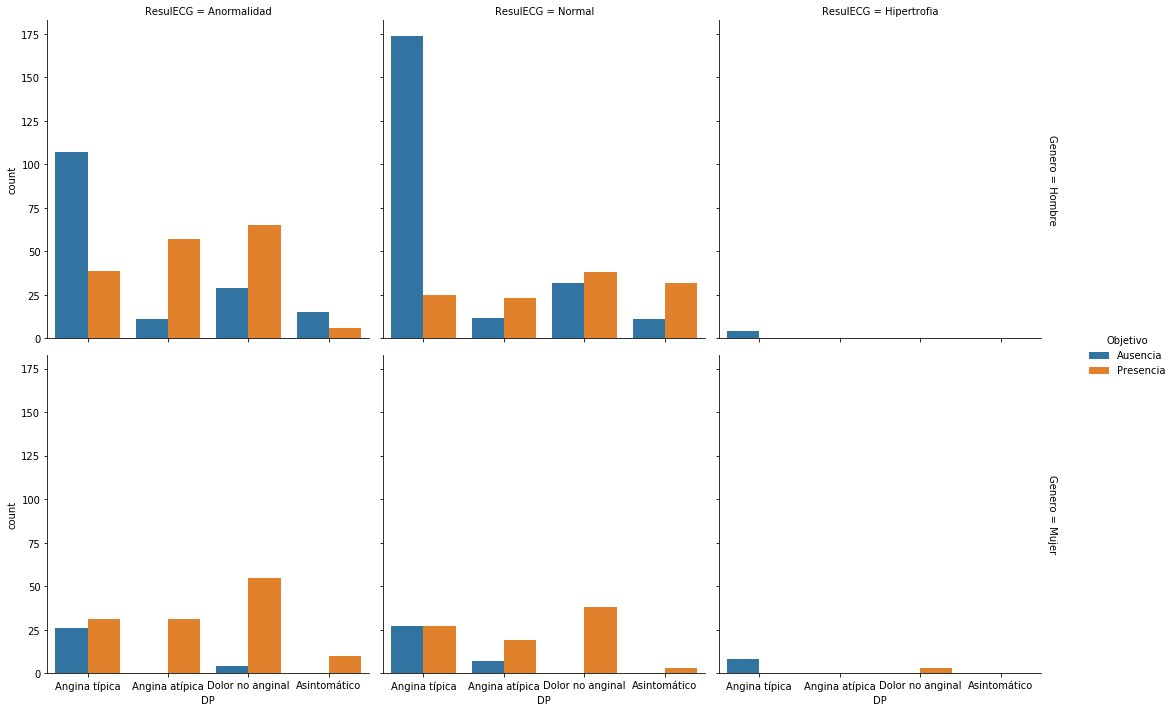

In [59]:
# Visualización multivariante
# Género, tipo de dolor en el pecho y ECG en reposo

sns.catplot(x="DP",hue="Objetivo", row="Genero",col="ResulECG",data=dsHeart,kind="count",margin_titles=True)

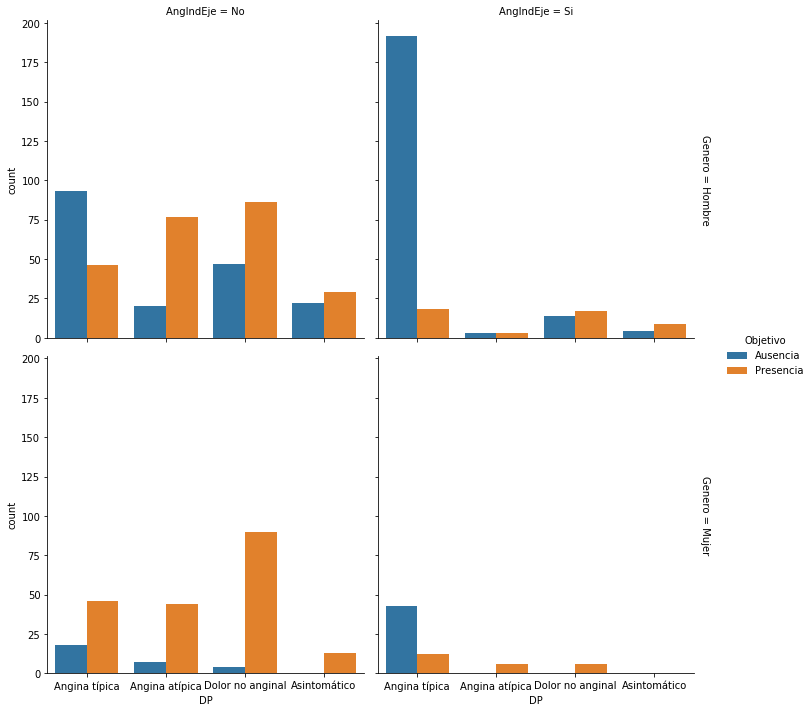

In [60]:
# Género, tipo de dolor en el pecho y angina inducida por ejercicio
# AngIndEje: angina inducida por ejercicio (1 = sí; 0 = no)

sns.catplot(x="DP",hue="Objetivo", row="Genero",col="AngIndEje",data=dsHeart, kind="count",margin_titles=True);

In [61]:
# Aplicando modelos. 
# Crear variables ficticias

dsHeart['Objetivo']=dsHeart['Objetivo'].replace( ['Ausencia', 'Presencia'],[0,1])
dsHeart['Objetivo']=dsHeart['Objetivo'].astype('int64')
dsHeart = pd.get_dummies(dsHeart,drop_first=False)

In [62]:
# Escalando las variables numéricas

dsHeart = (dsHeart - np.min(dsHeart)) / (np.max(dsHeart) - np.min(dsHeart)).values
dsHeart.head()

Edad        PA    Colest       FCM     DepST        CA  Objetivo  \
0  0.479167  0.360465  0.320896  0.701754  0.227273  0.666667       0.0   
1  0.500000  0.534884  0.287313  0.587719  0.704545  0.000000       0.0   
2  0.854167  0.593023  0.179104  0.324561  0.590909  0.000000       0.0   
3  0.666667  0.627907  0.287313  0.640351  0.000000  0.333333       0.0   
4  0.687500  0.511628  0.626866  0.157895  0.431818  1.000000       0.0   

   Genero_Hombre  Genero_Mujer  DP_Angina atípica  ...  ResulECG_Hipertrofia  \
0            1.0           0.0                0.0  ...                   0.0   
1            1.0           0.0                0.0  ...                   0.0   
2            1.0           0.0                0.0  ...                   0.0   
3            1.0           0.0                0.0  ...                   0.0   
4            0.0           1.0                0.0  ...                   0.0   

   ResulECG_Normal  AngIndEje_No  AngIndEje_Si  PenSegST_Bajada  \
0              0.0           1.0           0.0              1.0   
1              1.0           0.0           1.0              0.0   
2              0.0           0.0           1.0              0.0   
3              0.0           1.0           0.0              1.0   
4              0.0           1.0           0.0              0.0   

   PenSegST_Plano  PenSegST_Subida  Talasemia_Defecto fijo  \
0             0.0              0.0                     0.0   
1             0.0              1.0                     0.0   
2             0.0              1.0                     0.0   
3             0.0              0.0                     0.0   
4             1.0              0.0                     1.0   

   Talasemia_Defecto reversible  Talasemia_Normal  
0                           1.0               0.0  
1                           1.0               0.0  
2                           1.0               0.0  
3                           1.0               0.0  
4                           0.0               0.0  

[5 rows x 26 columns]

In [63]:
# División de conjunto de datos en Train y Test

X_train, X_test, y_train, y_test = train_test_split(dsHeart.drop('Objetivo', 1), dsHeart['Objetivo'], test_size = .2, random_state=42,shuffle=True)

In [64]:
# Regresión logística, modelo TRAINING
# Ajuste de hiperparámetros usando GridSearchCV

from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced',random_state=42)
param_grid = { 
    'C': [0.1,0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}
CV_rfc = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'C': 0.4, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}

In [65]:
# Ajustando el modelo: entrenando el modelo con todos los atributos

# lr1=LogisticRegression(C=0.2,random_state=42,penalty='l1',class_weight={0:1,1:1})
lr1=LogisticRegression(C=0.4,random_state=42,penalty='l2',class_weight={0:1,1:1})
lr1.fit(X_train,y_train)

LogisticRegression(C=0.4, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred1=lr1.predict(X_test)
print("Puntuación de TRAIN logístico con ",format(lr1.score(X_train, y_train)))
print("Puntaje de TEST logística con ",format(lr1.score(X_test, y_test)))

Puntuación de TRAIN logístico con  0.847741935483871
Puntaje de TEST logística con  0.8711340206185567


Text(0.5, 257.44, 'Etiqueta pronosticada')

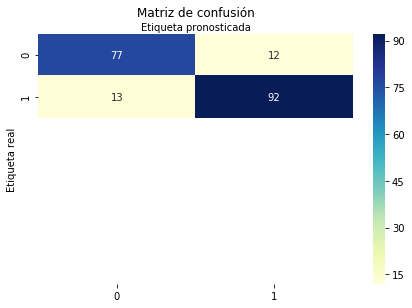

In [67]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred1)
bla=sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')

In [68]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensibilidad / recuperación : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Especificidad : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precisión : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 Puntuación : ', F1score2)

Sensibilidad / recuperación :  0.8761904761904762
Especificidad :  0.8651685393258427
Precisión :  0.8846153846153846
F1 Puntuación :  0.8803827751196172


In [69]:
test_attributes=X_test[['DepST','FCM','CA','Talasemia_Defecto reversible','DP_Asintomático']]
train_attributes=X_train[['DepST','FCM','CA','Talasemia_Defecto reversible','DP_Asintomático']]
lr2=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr2.fit(train_attributes,y_train)

LogisticRegression(C=0.3, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred2=lr2.predict(test_attributes)
print("Puntuación de TRAIN logístico con ",format(lr2.score(train_attributes, y_train)))
print("Puntaje de TEST logística con ",format(accuracy_score(y_pred1, y_test)))

Puntuación de TRAIN logístico con  0.8361290322580646
Puntaje de TEST logística con  0.8711340206185567


Text(0.5, 257.44, 'Etiqueta pronosticada')

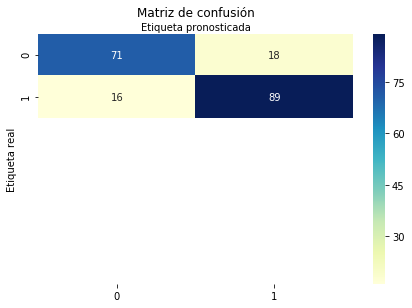

In [71]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')

In [72]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensibilidad / recuperación : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Especificidad : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precisión : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 Puntuación : ', F1score2)

Sensibilidad / recuperación :  0.8476190476190476
Especificidad :  0.797752808988764
Precisión :  0.8317757009345794
F1 Puntuación :  0.839622641509434


In [73]:
# K-FOLD Validación Cruzada

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf.get_n_splits(X_train, y_train)
results = cross_val_score(lr1, X_train, y_train, cv=skf, n_jobs=1, scoring='accuracy')
results.mean()

0.8438709677419354

In [74]:
# Importancia de características

perm_imp1 = PermutationImportance(lr1, random_state=42,scoring='accuracy').fit(X_test, y_test)
eli5.show_weights(perm_imp1, feature_names = X_test.columns.tolist(),top=50)

In [75]:
X_train2=X_train.drop(['AngIndEje_No'],axis=1)
X_test2=X_test.drop(['AngIndEje_No'],axis=1)

In [76]:
# Aplicar modelo después de eliminar el atributo menos significativo

#lr2=LogisticRegression(C=0.2,penalty='l1',class_weight={0:1,1:1})
lr2=LogisticRegression(C=0.4,penalty='l2',class_weight={0:1,1:1})
lr2.fit(X_train2,y_train)
y_pred2=lr2.predict(X_test2)

In [77]:
print("Puntuación de TRAIN logístico con ",format(lr2.score(X_train2, y_train)))
print("Puntaje de TEST logística con ",format(lr2.score(X_test2, y_test)))

Puntuación de TRAIN logístico con  0.8516129032258064
Puntaje de TEST logística con  0.8762886597938144


In [78]:
# Importancia de la característica

perm_imp1 = PermutationImportance(lr2, random_state=42,scoring='accuracy').fit(X_test2, y_test)
eli5.show_weights(perm_imp1, feature_names = X_test2.columns.tolist(),top=50)

In [79]:
X_train3=X_train2.drop(['Edad','Talasemia_Defecto fijo','PenSegST_Plano','PenSegST_Bajada','ResulECG_Hipertrofia','ResulECG_Anormalidad','AzuSan_Si','DepST'],axis=1)
X_test3=X_test2.drop(['Edad','Talasemia_Defecto fijo','PenSegST_Plano','PenSegST_Bajada','ResulECG_Hipertrofia','ResulECG_Anormalidad','AzuSan_Si','DepST'],axis=1)

In [80]:
lr3=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr3.fit(X_train3,y_train)
y_pred3=lr3.predict(X_test3)
y_probab3=lr3.predict_proba(X_test3)

In [81]:
print("Puntuación de TRAIN logístico con ",format(lr2.score(X_train2, y_train)))
print("Puntaje de TEST logística con ",format(lr2.score(X_test2, y_test)))

Puntuación de TRAIN logístico con  0.8516129032258064
Puntaje de TEST logística con  0.8762886597938144


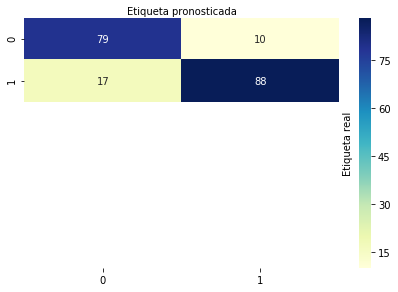

In [82]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm2 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm2, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.yaxis.set_label_position("right")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')
plt.savefig("report\\cmlr.png")

In [83]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensibilidad / recuperación : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Especificidad : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precisión : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 Puntuación : ', F1score2)

Sensibilidad / recuperación :  0.8380952380952381
Especificidad :  0.8876404494382022
Precisión :  0.8979591836734694
F1 Puntuación :  0.8669950738916257


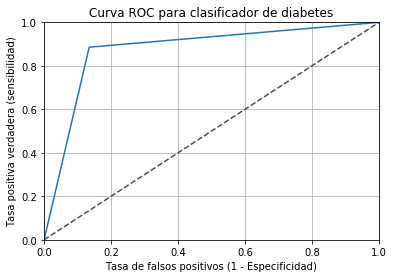

In [84]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred2)
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para clasificador de diabetes')
plt.xlabel('Tasa de falsos positivos (1 - Especificidad)')
plt.ylabel('Tasa positiva verdadera (sensibilidad)')
plt.grid(True)
plt.savefig("report\\roclr.png")

In [85]:
# El mayor AUC, mejor es el modelo para distinguir entre pacientes con enfermedad y sin enfermedad.
roc_auc2 = auc(fpr1, tpr1)
roc_auc2

0.8754414125200642

In [86]:
# Reducción del error tipo II

y_pred04=[]
for i in range(len(y_probab3)):
    y_pred04.append(1 if y_probab3[i,1]>0.3 else 0)

Text(0.5, 257.44, 'Etiqueta pronosticada')

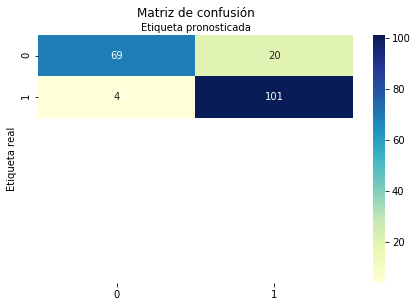

In [87]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm04 = confusion_matrix(y_test, y_pred04)
sns.heatmap(cm04, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')

In [88]:
sensitivity04 = cm04[1,1]/(cm04[1,1]+cm04[1,0])
print('Sensibilidad / recuperación : ', sensitivity04)

specificity04 = cm04[0,0]/(cm04[0,0]+cm04[0,1])
print('Especificidad : ', specificity04)

precision04 = cm04[1,1]/(cm04[1,1]+cm04[0,1])
print('Precisión : ', precision04)

F1score04=(2*sensitivity04*precision04)/(sensitivity04+precision04)
print('F1 Puntuación : ', F1score04)

Sensibilidad / recuperación :  0.9619047619047619
Especificidad :  0.7752808988764045
Precisión :  0.8347107438016529
F1 Puntuación :  0.8938053097345132


In [89]:
# Regresión logística con PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
trainComponents = pca.fit_transform(X_train)
testComponents = pca.fit_transform(X_test)
lr=LogisticRegression(C=0.3,penalty='l2',class_weight={0:1,1:1})
lr.fit(trainComponents,y_train)
y_pred5=lr.predict(testComponents)
print("Puntuación de TRAIN logístico con ",format(lr.score(trainComponents, y_train)))
print("Puntaje de TEST logística con ",format(lr.score(testComponents, y_test)))

Puntuación de TRAIN logístico con  0.8296774193548387
Puntaje de TEST logística con  0.7577319587628866


In [90]:
pca.explained_variance_ratio_.cumsum()

array([0.27728899, 0.42249773, 0.5600581 , 0.64900862, 0.71334012,
       0.77229539, 0.82556942, 0.87136505, 0.89766518, 0.92206468])

Text(0.5, 257.44, 'Etiqueta pronosticada')

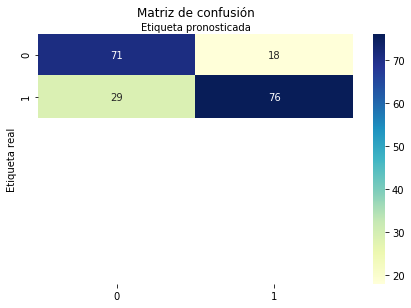

In [91]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm04 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm04, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')

In [92]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensibilidad / recuperación : ', sensitivity2)

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Especificidad : ', specificity2)

precision2 = cm2[1,1]/(cm2[1,1]+cm2[0,1])
print('Precisión : ', precision2)

F1score2=(2*sensitivity2*precision2)/(sensitivity2+precision2)
print('F1 Puntuación : ', F1score2)

Sensibilidad / recuperación :  0.8380952380952381
Especificidad :  0.8876404494382022
Precisión :  0.8979591836734694
F1 Puntuación :  0.8669950738916257


In [93]:
# Random Forest: Ajuste de hiperparámetros usando GridSearch

from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(oob_score=True,random_state=42)
param_grid = { 
    'n_estimators': [200,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [94]:
model = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [95]:
estimator = model.estimators_[3]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'Ausencia'
y_train_str[y_train_str == '1'] = 'Presencia'
y_train_str = y_train_str.values

In [96]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

os.environ["PATH"] += os.pathsep + 'C:\\Users\\u22v03\\Documents\\Python Scripts\\heart\\release\\bin'
!dot -Tpng tree.dot -o tree.png -Gdpi=600

from IPython.display import Image
Image(filename = 'tree.png')

In [97]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [98]:
print("Puntaje de TRAIN random forest con ",format(model.score(X_train, y_train)))
print("Puntaje de TEST random forest con ",format(model.score(X_test, y_test)))

Puntaje de TRAIN random forest con  0.9729032258064516
Puntaje de TEST random forest con  0.9690721649484536


In [99]:
# Importancia de la característica

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
CA                              0.127171
Talasemia_Defecto fijo          0.096106
DepST                           0.093327
DP_Angina típica                0.083507
Talasemia_Defecto reversible    0.081066
FCM                             0.079710
Edad                            0.068176
Colest                          0.055950
PA                              0.051746
AngIndEje_Si                    0.035251
AngIndEje_No                    0.033164
PenSegST_Bajada                 0.031922
Genero_Hombre                   0.031569
PenSegST_Plano                  0.027385
Genero_Mujer                    0.026458
DP_Dolor no anginal             0.016839
ResulECG_Anormalidad            0.011326
ResulECG_Normal                 0.009841
DP_Angina atípica               0.008225
DP_Asintomático                 0.007698
AzuSan_Si                       0.007650
AzuSan_No                       0.006503
Talasemia_Normal                0.004767
PenSegST_Subida                 0.004329
ResulECG_Hipertrofia            0.000313

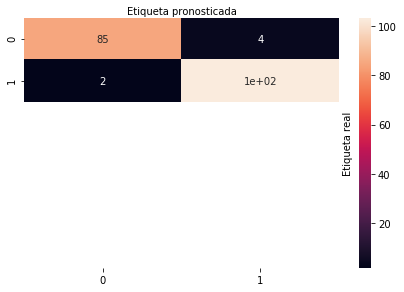

In [100]:
cm4 = confusion_matrix(y_test, y_pred_bin)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm4,annot=True)
ax.xaxis.set_label_position("top")
ax.yaxis.set_label_position("right")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta pronosticada')
plt.savefig("report\\cmrf.png")

In [101]:
sensitivity4 = cm4[1,1]/(cm4[1,1]+cm4[1,0])#how good a test is at detecting the positives
print('Sensibilidad / recuperación : ', sensitivity4)

specificity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])#how good a test is at avoiding false alarms
print('Especificidad : ', specificity4)

precision4 = cm4[1,1]/(cm4[1,1]+cm4[0,1])#how many of the positively classified were relevant
print('Precisión : ', precision4)

F1score4=(2*sensitivity4*precision4)/(sensitivity4+precision4)# low false positives and low false negatives
print('F1 Puntuación : ', F1score4)

Sensibilidad / recuperación :  0.9809523809523809
Especificidad :  0.9550561797752809
Precisión :  0.9626168224299065
F1 Puntuación :  0.9716981132075471


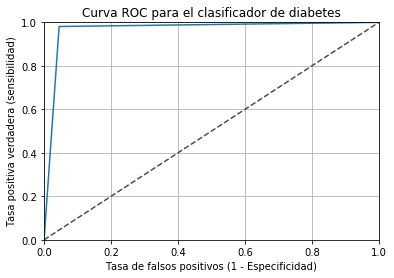

In [102]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_bin)
fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para el clasificador de diabetes')
plt.xlabel('Tasa de falsos positivos (1 - Especificidad)')
plt.ylabel('Tasa positiva verdadera (sensibilidad)')
plt.grid(True)
plt.savefig("report\\rocrf.png")

In [103]:
# Aplicar modelo después de eliminar atributos menos significativos

X_train5=X_train.drop(['ResulECG_Anormalidad'],axis=1)
X_test5=X_test.drop(['ResulECG_Anormalidad'],axis=1)

In [104]:
model = RandomForestClassifier(max_depth=5,oob_score=True,random_state=42,criterion='gini',max_features='auto',n_estimators=300)
model.fit(X_train5, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [105]:
y_pred_quant = model.predict_proba(X_test5)[:, 1]
y_pred_bin = model.predict(X_test5)

In [106]:
print("Puntaje de TRAIN random forest con ",format(model.score(X_train5, y_train)))
print("Puntaje de TEST random forest con ",format(model.score(X_test5, y_test)))

Puntaje de TRAIN random forest con  0.9432258064516129
Puntaje de TEST random forest con  0.9226804123711341


In [107]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_bin=model.predict(X_test)

In [108]:
param_grid = {"criterion": ['entropy', 'gini'],
              "min_samples_split": [5,10,15],
              "max_depth": [2,3,5],
              "min_samples_leaf": [5,10,15],
              "max_leaf_nodes": [5,10,15],
              }

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [109]:
print("Puntaje de TRAIN random forest con ",format(model.score(X_train, y_train)))
print("Puntaje de TEST random forest con ",format(model.score(X_test, y_test)))

Puntaje de TRAIN random forest con  1.0
Puntaje de TEST random forest con  1.0
